<a href="https://colab.research.google.com/github/RayhanehCoding/Personal-Projects/blob/main/stock_price_prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this project, I am going to predict the price of Apple Inc data for the openeing time of Feb 7, 2025, using the historical stock data of the previous month.

Skills used in this project include:

Technical Skills:

 Python Programming – Data handling, model training, and evaluation.

 Machine Learning (Support Vector Regression - SVR) – RBF, linear, and polynomial kernels.

 Data Preprocessing – Cleaning, reshaping, and preparing time-series data.

 Feature Engineering – Converting dates into numerical format for model training.

 Model Evaluation – Using MSE, RMSE, and R² to assess model performance.

 Data Visualization – Plotting actual vs. predicted prices with Matplotlib.

Tools & Libraries:

 NumPy – Array manipulations and reshaping data.

 Matplotlib – Creating visual plots for insights.

 Scikit-Learn – Implementing SVR models and evaluation metrics.

Statistical Modeling:

RBF Kernel SVR – Captures non-linear patterns in stock price data.

Linear Kernel SVR – Assumes a straight-line relationship between dates and prices.

Polynomial Kernel SVR – Fits a curved relationship using a polynomial function.





I have already downloaded the dataset from Yahoo Finance and stored is as a csv file!

In [11]:
# dependencies
import csv # to read the data files
import pandas as pd # to read the data files
import numpy as np # numpy allows calculations on data
import matplotlib.pyplot as plt # to plot graphs

from datetime import timedelta as dt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score



Model Evaluation:
RBF Model - MSE: 4.6432, RMSE: 2.1548, R² Score: 0.8786
Linear Model - MSE: 37.7377, RMSE: 6.1431, R² Score: 0.0132
Polynomial Model - MSE: 39.0753, RMSE: 6.2510, R² Score: -0.0218


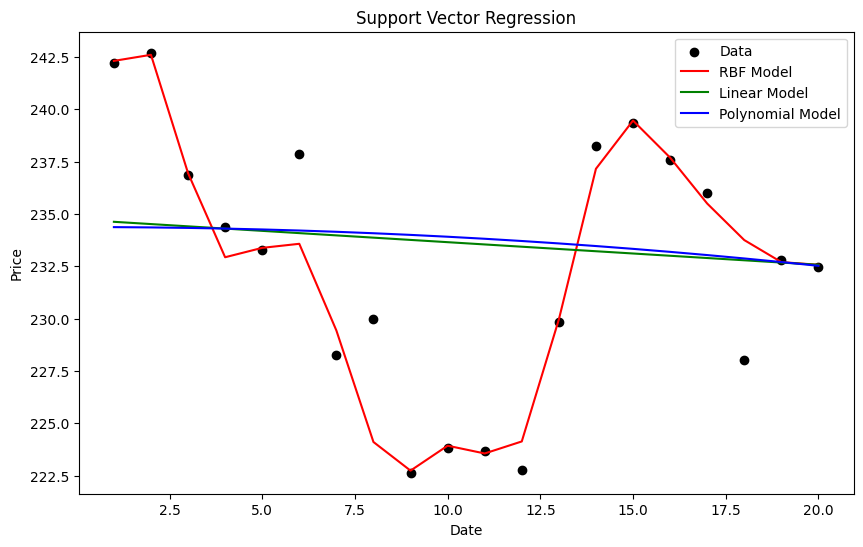

Final predicted price using RBF model:  232.699789620018
Final predicted price using Linear Regression model:  232.67812576297032
Final predicted price using Polynomial model:  232.70213969989032


In [12]:
dates = []
prices = []

def get_data(filename):
  with open(filename, 'r') as csvfile:
    csvFileReader = csv.reader(csvfile)
    next(csvFileReader)
    next(csvFileReader)
    next(csvFileReader)
    # Read the next 20 data rows
    for i, row in enumerate(csvFileReader, start=1):  # 'i' will be the numerical value
      if i <= 20:  # Ensure we only collect 20 dates
          dates.append(i)  # Assign a numerical value from 1 to 20
          prices.append(float(row[1]))  # Assuming second column is 'Price'
      else:
        break  # Stop once we have 20 entries
  return

def predict_prices(dates, prices, x):
  dates = np.reshape(dates, (len(dates), 1)) # we are building a n by 1 matrix
  x = np.array(x).reshape(-1, 1)  # Ensure x is a 2D array
  # we want to build a model that predixts the next data point so we use regression
  svr_lin = SVR(kernel = 'linear', C=1e3) # c is the penalty
  svr_poly = SVR(kernel = 'poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma = 0.1) # gamma defines how far too far is for max similarity
  # using the fit() method we are going to train our model on the data

  svr_lin.fit(dates, prices)
  svr_poly.fit(dates, prices)
  svr_rbf.fit(dates, prices)

  # Get predictions for training data
  pred_rbf = svr_rbf.predict(dates)
  pred_lin = svr_lin.predict(dates)
  pred_poly = svr_poly.predict(dates)

  # compute acuracy maetrics for RBF
  mse_rbf = mean_squared_error(prices, pred_rbf) # mean squared error
  rmse_rbf = np.sqrt(mse_rbf) # root mean squared error
  r2_rbf = r2_score(prices, pred_rbf) # r2 score

  # compute acuracy maetrics for Linear Regression Model
  mse_lin = mean_squared_error(prices, pred_lin) # mean squared error
  rmse_lin = np.sqrt(mse_lin) # root mean squared error
  r2_lin = r2_score(prices, pred_lin) # r2 score

  # compute acuracy maetrics for Polynomial Regression Model
  mse_poly = mean_squared_error(prices, pred_poly) # mean squared error
  rmse_poly = np.sqrt(mse_poly) # root mean squared error
  r2_poly = r2_score(prices, pred_poly) # r2 score

  # print the accuracy metrics
  print("\nModel Evaluation:")
  print(f"RBF Model - MSE: {mse_rbf:.4f}, RMSE: {rmse_rbf:.4f}, R² Score: {r2_rbf:.4f}")
  print(f"Linear Model - MSE: {mse_lin:.4f}, RMSE: {rmse_lin:.4f}, R² Score: {r2_lin:.4f}")
  print(f"Polynomial Model - MSE: {mse_poly:.4f}, RMSE: {rmse_poly:.4f}, R² Score: {r2_poly:.4f}")

  # predict for given input x
  predicted_rbf = svr_rbf.predict(x)[0]
  predicted_lin = svr_lin.predict(x)[0]
  predicted_poly = svr_poly.predict(x)[0]

  plt.figure(figsize=(10, 6))
  plt.scatter(dates, prices, color = 'black', label = 'Data')
  plt.plot(dates, pred_rbf, color = 'red', label='RBF Model')
  plt.plot(dates, pred_lin, color='green', label = 'Linear Model')
  plt.plot(dates, pred_poly, color = 'blue', label = 'Polynomial Model')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('Support Vector Regression')
  plt.legend()
  plt.show()

  return predicted_rbf, predicted_lin, predicted_poly

get_data('/content/drive/MyDrive/projects/AAPL_last_month.csv')

predicted_price = predict_prices(dates, prices, 19)

print("Final predicted price using RBF model: ", predicted_price[0])
print("Final predicted price using Linear Regression model: ", predicted_price[1])
print("Final predicted price using Polynomial model: ", predicted_price[2])
